# **卷積神經網路 (Convolutional Neural Network)**

* [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) 是由 Alex Krizhevsky, Vinod Nair 和 Geoffrey Hinton 蒐集的資料集
  * 60000張32x32彩色圖像
  * 包含十種類別：飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船 與 卡車
  * 訓練集為50000張，其中每個類別各5000張；測試集為10000張，其中每個類別各1000張


![git](https://2.bp.blogspot.com/-XFJ8r9tljKE/Wsx1fHLFgaI/AAAAAAAAJ7U/Q5Xzo6YHWEMLJ92Cd10EMLGjOIsxD807ACLcBGAs/s1600/cifar10-ten-categories.jpg)

## 讀取影像資料集
* 計算訓練與測試集維度
* 計算訓練與測試集的類別數量
* 繪出影像

In [ ]:
from keras.datasets import cifar10
from collections import Counter

(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data() 
print("訓練集維度", x_train_image.shape)
print("測試集維度", x_test_image.shape)
print("訓練集標籤數量： %s" %Counter(y_train_label.T[0]))
print("訓練集標籤數量： %s" %Counter(y_test_label.T[0]))

Using TensorFlow backend.


170500096/170498071 [==============================] - 12s 0us/step
訓練集維度 (50000, 32, 32, 3)
測試集維度 (10000, 32, 32, 3)
訓練集標籤數量： Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
訓練集標籤數量： Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


(32, 32, 3)
[6]


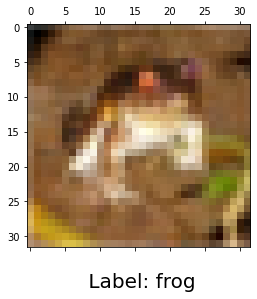

In [ ]:
import matplotlib.pyplot as plt

feature_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

first_label = y_train_label[0]
first_img = x_train_image[0]
first_label_name = feature_name[first_label[0]]
print(first_img.shape)
print(first_label)

plt.matshow(first_img)
plt.xlabel("\n Label: %s" %(first_label_name), size=20)
plt.show()

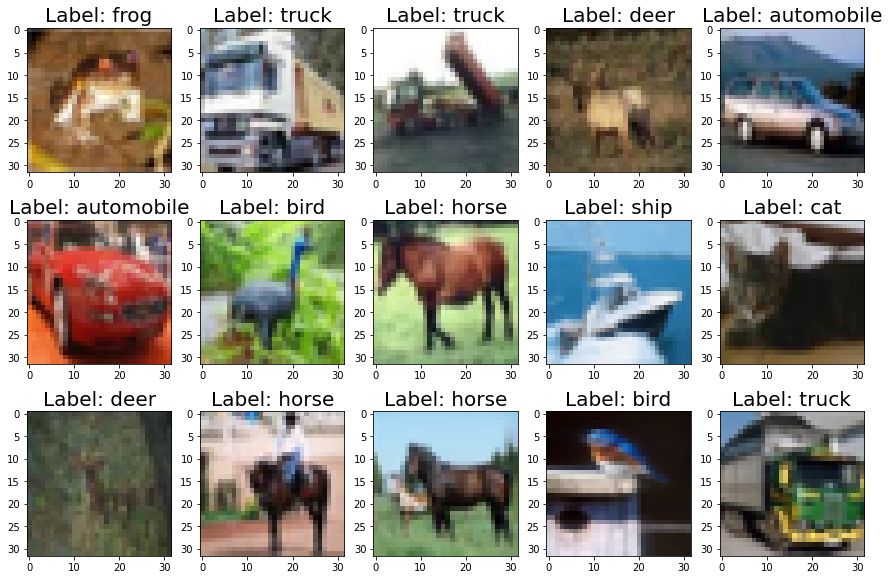

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(15):
  ax = plt.subplot(3,5, 1+i)
  ax.imshow(x_train_image[i]) 
  ax.set_title("Label: %s" %(feature_name[y_train_label[i][0]]), size=20)
plt.show()

## 資料前處理
* 特徵正規化
* 標籤獨熱邊碼

In [ ]:
x_train = x_train_image.astype('float32')/255
x_test = x_test_image.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)
print("原始標籤：", y_train_label[0])
print("原始標籤：", y_train[0])

原始標籤： [6]
原始標籤： [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 建立卷積神經網路
* 建立序列式模型
  * 卷積層 (Convolution Layer)
  * 激勵函數 (Activation Function)
  * 填充 (Padding)
  * 丟棄法 (Dropout)
  * 池化層 (Pooling Layer)
  * 全連接層 (Fully Connected Layer)
  * 輸出層 (Output Layer)：sofmax, sigmoid

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(32,32,3)))
# print(cnn.get_weights())
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dropout(0.25))

cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

## 指定訓練集評量方式來編譯模型
* 損失函數 (Loss function)
* 優化器 (Optimizer)

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## 訓練模型
* 小批量(Mini-batch)
* 分割驗證集(Validation Set)

In [ ]:
history = cnn.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_split= 0.1)

Epoch 1/20
352/352 [==============================] - 118s 336ms/step - loss: 1.4852 - acc: 0.4688 - val_loss: 1.3246 - val_acc: 0.5834
Epoch 2/20
352/352 [==============================] - 119s 339ms/step - loss: 1.1293 - acc: 0.6037 - val_loss: 1.0997 - val_acc: 0.6540
Epoch 3/20
352/352 [==============================] - 120s 340ms/step - loss: 0.9816 - acc: 0.6546 - val_loss: 1.0262 - val_acc: 0.6660
Epoch 4/20
352/352 [==============================] - 120s 342ms/step - loss: 0.8840 - acc: 0.6880 - val_loss: 0.9131 - val_acc: 0.7094
Epoch 5/20
352/352 [==============================] - 120s 342ms/step - loss: 0.7982 - acc: 0.7182 - val_loss: 0.8405 - val_acc: 0.7166
Epoch 6/20
352/352 [==============================] - 119s 339ms/step - loss: 0.7264 - acc: 0.7454 - val_loss: 0.8208 - val_acc: 0.7330
Epoch 7/20
352/352 [==============================] - 119s 339ms/step - loss: 0.6512 - acc: 0.7702 - val_loss: 0.7921 - val_acc: 0.7400
Epoch 8/20
352/352 [============================

## 繪製學習曲線
* 訓練與驗證集的準確度及損失值之曲線

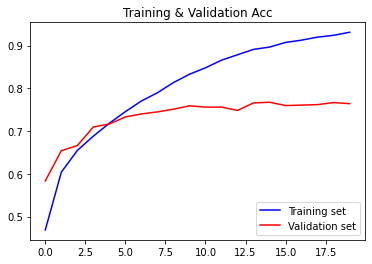

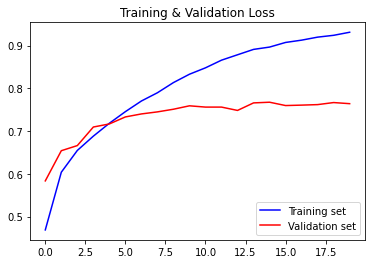

In [ ]:
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.title("Training & Validation Acc")
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set")
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set")
plt.legend(loc='lower right')
plt.show()

plt.title("Training & Validation Loss")
plt.plot(np.arange(len(loss)), acc,color='b', label="Training set")
plt.plot(np.arange(len(val_loss)), val_acc,color='r', label="Validation set")
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("測試集的準確度為：%0.4f" %(test_acc))
print("測試集的損失值為：%0.4f" %(test_loss))

predict = cnn.predict(x_test)
#predict.round(1)

313/313 [==============================] - 7s 22ms/step - loss: 0.7616 - acc: 0.7555
測試集的準確度為：0.7555
測試集的損失值為：0.7616


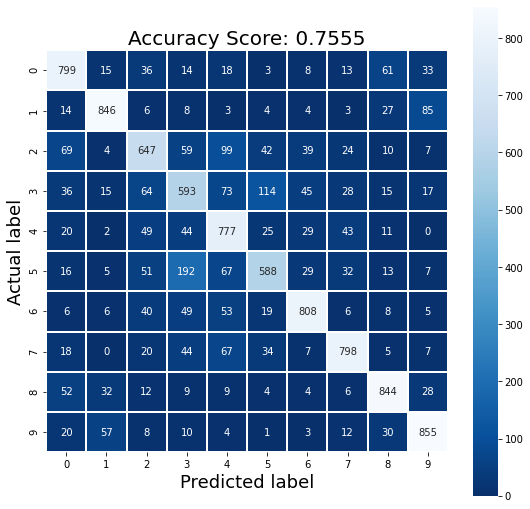

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

predictions = [np.argmax(one_hot)for one_hot in predict]

cm = confusion_matrix(y_test_label, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 18);
plt.xlabel('Predicted label', size = 18);
plt.title('Accuracy Score: %0.4f' %(test_acc), size = 20);

## 儲存模型與權重

In [ ]:
from keras.models import load_model

#儲存模型
cnn.save('cnn_cifar10.h5')

#載入模型
from tensorflow.keras.models import load_model

cnn = load_model('cnn_cifar10.h5')